**CPT212 : DESIGN & ANALYSIS OF ALGORITHMS**  
*Semester II, Academic Session: 2024/2025*  

**Assignment 1**: Principles of Analysis of Algorithms and Sorting Methods  

**Group Members**:  
- Goh Shu Ying (**22305493**)  
- Saw Yee Xuan (**22305488**)  
- Arwen Laung Ai Wen (**22303449**)

In [ ]:
# Graph of Number of Primitive Operations of Numbers and Strings Against Input Size

import pandas as pd
from bokeh.plotting import figure, show, output_file
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.io import output_notebook

# Display in Jupyter Notebook
output_notebook()

# Read only required columns from CSV
df_number = pd.read_csv('RadixSort_Analysis.csv', usecols=['Array Size', 'Operations'])
df_string = pd.read_csv('RadixSortWords_Analysis.csv', usecols=['Array Size', 'Operations'])

# Prepare data for the graph
source = ColumnDataSource(data=dict(
    input_sizes_number=df_number['Array Size'],
    operations_number=df_number['Operations'],
    operations_string=df_string['Operations']
))

# Create plot
p = figure(title="Number of Primitive Operations of Numbers and Strings Against Input Size",
           x_axis_label='Input Size',
           y_axis_label='Number of Primitive Operations',
           width=1000, height=600,
           tools="pan,wheel_zoom,box_zoom,reset")

# Plot line and markers for numbers
p.line('input_sizes_number', 'operations_number', source=source, line_width=2, color="blue", legend_label="Numbers Operations")
p.circle('input_sizes_number', 'operations_number', source=source, size=6, color="blue")

# Plot line and markers for strings
p.line('input_sizes_number', 'operations_string', source=source, line_width=2, color="pink", legend_label="Strings Operations")
p.x('input_sizes_number', 'operations_string', source=source, size=6, color="pink")

# Hover tool
hover = HoverTool(tooltips=[
    ("Input Size", "@input_sizes_number"),
    ("Numbers Operations", "@operations_number"),
    ("Strings Operations", "@operations_string")
])
p.add_tools(hover)

# Show plot
output_file("bokeh_plot.html", mode="inline")
show(p)


Loading BokehJS ...

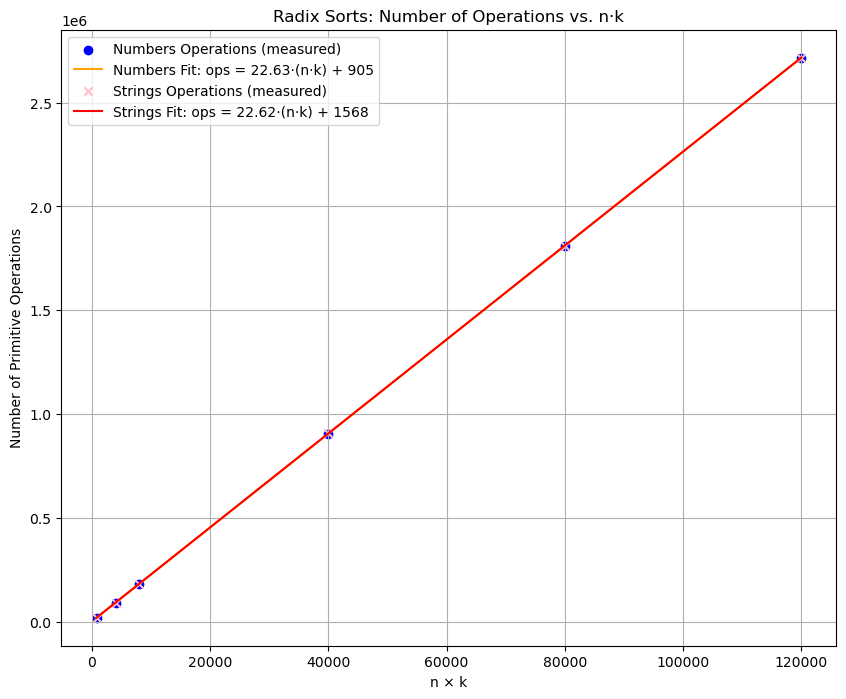

In [ ]:
# Graph of Number of Primitive Operations of Numbers and Strings Against n·k

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the two CSV files
df_digits = pd.read_csv('RadixSort_Analysis.csv')
df_alphabets = pd.read_csv('RadixSortWords_Analysis.csv')

# Set k (max digit and max alphabets) to 8
k_digits = 8
k_alphabets = 8

# Compute n * k for both datasets
df_digits['n * k'] = df_digits['Array Size'] * k_digits
df_alphabets['n * k'] = df_alphabets['Array Size'] * k_alphabets

# Create the plot
plt.figure(figsize=(10, 8))

# Plot scatter for numbers dataset
x_digits = df_digits['n * k']
y_digits = df_digits['Operations']
plt.scatter(x_digits, y_digits, label='Numbers Operations (measured)', color='blue', marker='o')

# Fit line for numbers dataset
m_digits, b_digits = np.polyfit(x_digits, y_digits, 1)
plt.plot(x_digits, m_digits * x_digits + b_digits, color='orange',
         label=f"Numbers Fit: ops = {m_digits:.2f}·(n·k) + {b_digits:.0f}")

# Plot scatter for strings dataset
x_strings = df_alphabets['n * k']
y_strings = df_alphabets['Operations']
plt.scatter(x_strings, y_strings, label='Strings Operations (measured)', color='pink', marker='x')

# Fit line for strings dataset
m_strings, b_strings = np.polyfit(x_strings, y_strings, 1)
plt.plot(x_strings, m_strings * x_strings + b_strings, color='red',
         label=f"Strings Fit: ops = {m_strings:.2f}·(n·k) + {b_strings:.0f}")

# Add labels and title
plt.xlabel('n × k')
plt.ylabel('Number of Primitive Operations')
plt.title('Radix Sorts: Number of Operations vs. n·k')
plt.legend()
plt.grid(True)
plt.ticklabel_format(style='plain', axis='x')  # Show full x-axis numbers

# Show plot
plt.show()